<a href="https://colab.research.google.com/github/Manilab2309/ia-machine-learning/blob/main/lab/NB_analyst_broker_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
print("Welcome aboard! Ramon!, now you're working on Jupyter & Visual Studio Code")

Welcome aboard! Ramon!, now you're working on Jupyter & Visual Studio Code


# Inicialization
Global configuration

In [88]:
# Import libraries
import pandas as pd
import datetime
import calendar
import math

# Colab limits by default table size to 25 columns
from google.colab.data_table import DataTable
DataTable.max_columns = 100
pd.set_option('display.max_rows', None) #Uncomment if you wish to see entire data table (not recommended)

# Data Loader
Read sources:


*   Ibex35
*   IPC
*   Euribor
*   Gold
*   Brent
*   Dolar/Euro
*   Mortality EU



## Read Ibex35 2023
Read from Github.com Ibex35 2023

Source: https://es.finance.yahoo.com/quote/%5EIBEX/history

In [89]:
df_ibex_2023 = pd.read_csv('https://raw.githubusercontent.com/Manilab2309/ia-machine-learning/main/samples/ibex35_2023.csv')

## Read IPC 2023
Read from Github.com IPC 2023 in this example we added two interesting clauses
 - on_bad_lines='skip' --> Very useful to force read csv files
 - sep = ';'           --> To customize char delimiter, by default is , When you get csv from excel, its set ; as delimiter then conflicts with panda parser.

Source: https://www.ine.es/prensa/ipc_tabla.htm

In [90]:
df_ipc_2023 = pd.read_csv('https://raw.githubusercontent.com/Manilab2309/ia-machine-learning/main/samples/IPC-2023.csv', on_bad_lines='skip', sep = ';')

## Read Euribor 2023
Read from Github.com Euribor 2023

Source: https://datosmacro.expansion.com/hipotecas/euribor?dr=2024-01

In [91]:
df_euribor_2023 = pd.read_csv('https://raw.githubusercontent.com/Manilab2309/ia-machine-learning/main/samples/Euribor-2023.csv', on_bad_lines='skip', sep = ';')

## Read Gold 2023
Read from Github.com Oro 2023

Source: https://es.finance.yahoo.com/quote/GC%3DF/history


In [92]:
df_gold_2023 = pd.read_csv('https://raw.githubusercontent.com/Manilab2309/ia-machine-learning/main/samples/Oro-2023.csv', on_bad_lines='skip', sep = ';')

## Read Brent 2023
Read from Github.com Petroleo 2023
Source: https://es.finance.yahoo.com/quote/BZ%3DF/history


In [93]:
df_brent_2023 = pd.read_csv('https://raw.githubusercontent.com/Manilab2309/ia-machine-learning/main/samples/Brent-2023.csv', on_bad_lines='skip', sep = ';')

## Read Dolar/Euro 2023
Read from Github.com $/Euro 2023

Source: https://es.finance.yahoo.com/quote/EURUSD%3DX/history

In [94]:
df_dolar_euro_2023 = pd.read_csv('https://raw.githubusercontent.com/Manilab2309/ia-machine-learning/main/samples/Dolar-Euro-2023.csv', on_bad_lines='skip', sep = ';')

## Excess mortality by month Euro 2023
Read from Github.com Mortality European

Source: https://ec.europa.eu/eurostat/databrowser/view/demo_mexrt/default/table?lang=en

In [95]:
df_excess_mortality_2023 = pd.read_csv('https://raw.githubusercontent.com/Manilab2309/ia-machine-learning/main/samples/Excess_mortality_by_month_2023.csv', on_bad_lines='skip', sep = ',')

# Data Formatter

 Global considerations:
 - Rename columns to be more specific
 - Floats will have . as separator decimal position
 - Floats will have only 2 decimal positions
 - Dates will have this format: 2023-01-02

## Formatter Ibex35 2023

Ibex35 csv source needs these format actions:

- Rename columns
- Set . as decimal separator token
- set 2 float positions
- Convert object to float64

In [96]:
# Actual situation
df_ibex_2023.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,8297.90,8384.90,8283.70,8369.70,8369.70,92193500
1,2023-01-03,8367.50,8454.30,8327.40,8397.40,8397.40,164671600
2,2023-01-04,8442.10,8560.50,8442.10,8559.80,8559.80,206752400
3,2023-01-05,8530.10,8618.90,8527.70,8607.60,8607.60,182438200
4,2023-01-06,8608.50,8701.10,8589.20,8701.10,8701.10,162161400


In [97]:
# Actual datatypes
df_ibex_2023.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [98]:
# Rename columns for later merge with other tables with similar named columns
df_ibex_2023 = df_ibex_2023.rename(columns={'Fecha': 'Date', 'Open': 'Ibex Open','High': 'Ibex High','Low': 'Ibex Low','Close': 'Ibex Close','Adj Close': 'Ibex Adj Close','Volume': 'Ibex Volume'})
df_ibex_2023

,Date,Ibex Open,Ibex High,Ibex Low,Ibex Close,Ibex Adj Close,Ibex Volume
0,2023-01-02,8297.90,8384.90,8283.70,8369.70,8369.70,92193500
1,2023-01-03,8367.50,8454.30,8327.40,8397.40,8397.40,164671600
2,2023-01-04,8442.10,8560.50,8442.10,8559.80,8559.80,206752400
3,2023-01-05,8530.10,8618.90,8527.70,8607.60,8607.60,182438200
4,2023-01-06,8608.50,8701.10,8589.20,8701.10,8701.10,162161400
5,2023-01-09,8691.00,8721.60,8661.40,8694.90,8694.90,215668200
6,2023-01-10,8668.40,8724.50,8666.70,8712.70,8712.70,147719000
7,2023-01-11,8722.80,8762.90,8700.70,8726.30,8726.30,166063200
8,2023-01-12,8737.80,8849.70,8735.20,8828.10,8828.10,203505800
9,2023-01-13,8838.00,8918.40,8828.70,8881.70,8881.70,197132600


In [99]:
# 8297.900391 (float64) --> 8297.90 (float64) We only need 2 decimal positions and . with decimal separator token char
pd.options.display.float_format = '{:.2f}'.format
df_ibex_2023

,Date,Ibex Open,Ibex High,Ibex Low,Ibex Close,Ibex Adj Close,Ibex Volume
0,2023-01-02,8297.90,8384.90,8283.70,8369.70,8369.70,92193500
1,2023-01-03,8367.50,8454.30,8327.40,8397.40,8397.40,164671600
2,2023-01-04,8442.10,8560.50,8442.10,8559.80,8559.80,206752400
3,2023-01-05,8530.10,8618.90,8527.70,8607.60,8607.60,182438200
4,2023-01-06,8608.50,8701.10,8589.20,8701.10,8701.10,162161400
5,2023-01-09,8691.00,8721.60,8661.40,8694.90,8694.90,215668200
6,2023-01-10,8668.40,8724.50,8666.70,8712.70,8712.70,147719000
7,2023-01-11,8722.80,8762.90,8700.70,8726.30,8726.30,166063200
8,2023-01-12,8737.80,8849.70,8735.20,8828.10,8828.10,203505800
9,2023-01-13,8838.00,8918.40,8828.70,8881.70,8881.70,197132600


## Formatter IPC 2023

IPC csv needs these format corrections:
- Rename columns
- Delete % char
- set . as decimal token delimiter
- set 2 float positions
- Dates: dec-23 --> 2023-12-01 (for getting this, we will need an expansion table)


In [100]:
# Actual situation
df_ipc_2023.head()

,Mes IPC,IPC Interanual,IPC Acum Enero,IPC Variacion Mensual
0,dec-23,"3,10%","3,10%",0%
1,nov-23,"3,20%","3,10%","-0,30%"
2,oct-23,"3,50%","3,40%","0,30%"
3,sep-23,"3,50%","3,10%","0,20%"
4,aug-23,"2,60%","3,00%","0,50%"


In [101]:
# Actual datatypes
df_ipc_2023.dtypes

Mes IPC                  object
IPC Interanual           object
IPC Acum Enero           object
IPC Variacion Mensual    object
dtype: object

In [102]:
# Rename column if you need
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

#In this example, lets translate headers to english and add % simbol, remember cells must be desired numbers or float format
df_ipc_2023 = df_ipc_2023.rename(columns={'Mes IPC': 'Date'})
df_ipc_2023 = df_ipc_2023.rename(columns={'IPC Interanual': 'IPC Interanual %'})
df_ipc_2023 = df_ipc_2023.rename(columns={'IPC Acum Enero': 'IPC Acum Jan %'})
df_ipc_2023 = df_ipc_2023.rename(columns={'IPC Variacion Mensual': 'IPC Month Variation %'})

# We can define variables to use in another cells
column_A_Renamed = 'Date'
column_B_Renamed = 'IPC Interanual %'
column_C_Renamed = 'IPC Acum Jan %'
column_D_Renamed = 'IPC Month Variation %'

df_ipc_2023.head()

,Date,IPC Interanual %,IPC Acum Jan %,IPC Month Variation %
0,dec-23,"3,10%","3,10%",0%
1,nov-23,"3,20%","3,10%","-0,30%"
2,oct-23,"3,50%","3,40%","0,30%"
3,sep-23,"3,50%","3,10%","0,20%"
4,aug-23,"2,60%","3,00%","0,50%"


In [103]:
# Remove % char from cells
df_ipc_2023[column_B_Renamed] = df_ipc_2023[column_B_Renamed].str.replace("%", "")
df_ipc_2023[column_C_Renamed] = df_ipc_2023[column_C_Renamed].str.replace("%", "")
df_ipc_2023[column_D_Renamed] = df_ipc_2023[column_D_Renamed].str.replace("%", "")

df_ipc_2023.head()

,Date,IPC Interanual %,IPC Acum Jan %,IPC Month Variation %
0,dec-23,"3,10","3,10",0
1,nov-23,"3,20","3,10","-0,30"
2,oct-23,"3,50","3,40","0,30"
3,sep-23,"3,50","3,10","0,20"
4,aug-23,"2,60","3,00","0,50"


In [104]:
# Convert , to . for decimal delimiter token
df_ipc_2023[column_B_Renamed] = df_ipc_2023[column_B_Renamed].str.replace(",", ".")
df_ipc_2023[column_C_Renamed] = df_ipc_2023[column_C_Renamed].str.replace(",", ".")
df_ipc_2023[column_D_Renamed] = df_ipc_2023[column_D_Renamed].str.replace(",", ".")
df_ipc_2023.head()

,Date,IPC Interanual %,IPC Acum Jan %,IPC Month Variation %
0,dec-23,3.10,3.10,0
1,nov-23,3.20,3.10,-0.30
2,oct-23,3.50,3.40,0.30
3,sep-23,3.50,3.10,0.20
4,aug-23,2.60,3.00,0.50


In [105]:
# Convert object to float
df_ipc_2023[column_B_Renamed] = df_ipc_2023[column_B_Renamed].astype('float64')
df_ipc_2023[column_C_Renamed] = df_ipc_2023[column_C_Renamed].astype('float64')
df_ipc_2023[column_D_Renamed] = df_ipc_2023[column_D_Renamed].astype('float64')
df_ipc_2023.dtypes

Date                      object
IPC Interanual %         float64
IPC Acum Jan %           float64
IPC Month Variation %    float64
dtype: object

In [106]:
# We need to transform the dates from: dic-23 to 2023-12-01, then we will have an aproximation to standard date time zones
# Documentation: https://strftime.org/
# Utils: https://strftime.net/

df_ipc_2023['Date'] = pd.to_datetime(df_ipc_2023['Date'],format='%b-%y').dt.strftime('%Y-%m-%d')
df_ipc_2023

,Date,IPC Interanual %,IPC Acum Jan %,IPC Month Variation %
0,2023-12-01,3.10,3.10,0.00
1,2023-11-01,3.20,3.10,-0.30
2,2023-10-01,3.50,3.40,0.30
3,2023-09-01,3.50,3.10,0.20
4,2023-08-01,2.60,3.00,0.50
5,2023-07-01,2.30,2.40,0.20
6,2023-06-01,1.90,2.20,0.60
7,2023-05-01,3.20,1.70,0.00
8,2023-04-01,4.10,1.70,0.60
9,2023-03-01,3.30,1.10,0.40


In [107]:
# Now we need expand the table

# Declare new Dataframe
df_ipc_2023_expanded = pd.DataFrame()
df_ipc_2023_expanded = pd.DataFrame(columns=[column_A_Renamed, column_B_Renamed, column_C_Renamed, column_D_Renamed])
# Variables column_x_Renamed are initialized in previos cell execution

for i in df_ipc_2023.index:

    instantDate = datetime.datetime.strptime(df_ipc_2023[column_A_Renamed][i], '%Y-%m-%d')
    year = instantDate.year
    month = instantDate.month
    num_days = calendar.monthrange(year, month)[1]
    days = [datetime.date(year, month, day).strftime('%Y-%m-%d') for day in range(1, num_days+1)]

    for d in days:
      # Add values to new dataframe
      df_ipc_2023_expanded.loc[len(df_ipc_2023_expanded.index)] = [d, df_ipc_2023[column_B_Renamed][i], df_ipc_2023[column_C_Renamed][i],df_ipc_2023[column_D_Renamed][i]]

df_ipc_2023_expanded

,Date,IPC Interanual %,IPC Acum Jan %,IPC Month Variation %
0,2023-12-01,3.10,3.10,0.00
1,2023-12-02,3.10,3.10,0.00
2,2023-12-03,3.10,3.10,0.00
3,2023-12-04,3.10,3.10,0.00
4,2023-12-05,3.10,3.10,0.00
5,2023-12-06,3.10,3.10,0.00
6,2023-12-07,3.10,3.10,0.00
7,2023-12-08,3.10,3.10,0.00
8,2023-12-09,3.10,3.10,0.00
9,2023-12-10,3.10,3.10,0.00


## Formatter Euribor 2023

Euribor source needs following format actions:
- Delete % char
- Set . as decimal token separator
- Convert object to float

In [108]:
# Actual situation
df_euribor_2023.head()

,Date,Euribor Type
0,2023-12-29,"3,51%"
1,2023-12-28,"3,54%"
2,2023-12-27,"3,55%"
3,2023-12-22,"3,58%"
4,2023-12-21,"3,58%"


In [109]:
# Actual datatypes
df_euribor_2023.dtypes

Date            object
Euribor Type    object
dtype: object

In [110]:
# Remove % char from cells
df_euribor_2023['Euribor Type'] = df_euribor_2023['Euribor Type'].str.replace("%", "")
df_euribor_2023.head()

,Date,Euribor Type
0,2023-12-29,"3,51"
1,2023-12-28,"3,54"
2,2023-12-27,"3,55"
3,2023-12-22,"3,58"
4,2023-12-21,"3,58"


In [111]:
# Convert , to . for decimal delimiter token
df_euribor_2023['Euribor Type'] = df_euribor_2023['Euribor Type'].str.replace(",", ".")
df_euribor_2023.head()

,Date,Euribor Type
0,2023-12-29,3.51
1,2023-12-28,3.54
2,2023-12-27,3.55
3,2023-12-22,3.58
4,2023-12-21,3.58


In [112]:
# Convert object to float
df_euribor_2023['Euribor Type'] = df_euribor_2023['Euribor Type'].astype('float64')
df_euribor_2023.dtypes

Date             object
Euribor Type    float64
dtype: object

## Formatter Gold 2023

Gold 2023 csv needs these format corrections:
- Rename columns
- Set . as decimal separator token
- set 2 float positions
- Convert object to float64

In [113]:
# Actual situation
df_gold_2023.head()

,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus,Volumen
0,2023-12-29,2068,"2068,9","2062,1","2062,4","2062,4",47
1,2023-12-28,"2081,6","2087,3","2066,5","2073,9","2073,9",338
2,2023-12-27,"2067,3","2081,9","2064,8","2081,9","2081,9",586
3,2023-12-26,2060,"2060,8","2054,2","2058,2","2058,2",64
4,2023-12-22,"2055,7","2068,7","2052,2","2057,1","2057,1",202


In [114]:
# Actual data types
df_gold_2023.dtypes

Fecha          object
Abrir          object
Máx.           object
Mín.           object
Cierre         object
Cierre ajus    object
Volumen        object
dtype: object

In [115]:
#In this example, lets translate headers to english and add % simbol, remember cells must be desired numbers or float format
df_gold_2023 = df_gold_2023.rename(columns={'Fecha': 'Date', 'Abrir': 'Gold Open','Máx.': 'Gold High','Mín.': 'Gold Low','Cierre': 'Gold Close','Cierre ajus': 'Gold Adj Close','Volumen': 'Gold Volume'})
df_gold_2023

# We can define variables to use in another cells
column_A_Renamed = 'Date'
column_B_Renamed = 'Gold Open'
column_C_Renamed = 'Gold High'
column_D_Renamed = 'Gold Low'
column_E_Renamed = 'Gold Close'
column_F_Renamed = 'Gold Adj Close'
column_G_Renamed = 'Gold Volume'

df_gold_2023.head()

,Date,Gold Open,Gold High,Gold Low,Gold Close,Gold Adj Close,Gold Volume
0,2023-12-29,2068,"2068,9","2062,1","2062,4","2062,4",47
1,2023-12-28,"2081,6","2087,3","2066,5","2073,9","2073,9",338
2,2023-12-27,"2067,3","2081,9","2064,8","2081,9","2081,9",586
3,2023-12-26,2060,"2060,8","2054,2","2058,2","2058,2",64
4,2023-12-22,"2055,7","2068,7","2052,2","2057,1","2057,1",202


In [116]:
# Convert , to . for decimal delimiter token
df_gold_2023[column_B_Renamed] = df_gold_2023[column_B_Renamed].str.replace(",", ".")
df_gold_2023[column_C_Renamed] = df_gold_2023[column_C_Renamed].str.replace(",", ".")
df_gold_2023[column_D_Renamed] = df_gold_2023[column_D_Renamed].str.replace(",", ".")
df_gold_2023[column_E_Renamed] = df_gold_2023[column_E_Renamed].str.replace(",", ".")
df_gold_2023[column_F_Renamed] = df_gold_2023[column_F_Renamed].str.replace(",", ".")

# Delete thousand separator units in Volume column
df_gold_2023[column_G_Renamed] = df_gold_2023[column_G_Renamed].str.replace(".", "")

# Delete illegal char "-" in Volume
df_gold_2023[column_G_Renamed] = df_gold_2023[column_G_Renamed].str.replace("-", "0")

df_gold_2023.head()

,Date,Gold Open,Gold High,Gold Low,Gold Close,Gold Adj Close,Gold Volume
0,2023-12-29,2068,2068.9,2062.1,2062.4,2062.4,47
1,2023-12-28,2081.6,2087.3,2066.5,2073.9,2073.9,338
2,2023-12-27,2067.3,2081.9,2064.8,2081.9,2081.9,586
3,2023-12-26,2060,2060.8,2054.2,2058.2,2058.2,64
4,2023-12-22,2055.7,2068.7,2052.2,2057.1,2057.1,202


In [117]:
# Convert , to . for decimal delimiter token
df_gold_2023[column_B_Renamed] = df_gold_2023[column_B_Renamed].astype("float64")
df_gold_2023[column_C_Renamed] = df_gold_2023[column_C_Renamed].astype("float64")
df_gold_2023[column_D_Renamed] = df_gold_2023[column_D_Renamed].astype("float64")
df_gold_2023[column_E_Renamed] = df_gold_2023[column_E_Renamed].astype("float64")
df_gold_2023[column_F_Renamed] = df_gold_2023[column_F_Renamed].astype("float64")
df_gold_2023[column_G_Renamed] = df_gold_2023[column_G_Renamed].astype("int64")

df_gold_2023.dtypes

Date               object
Gold Open         float64
Gold High         float64
Gold Low          float64
Gold Close        float64
Gold Adj Close    float64
Gold Volume         int64
dtype: object

## Formatter Brent 2023

Brent 2023 csv needs these format corrections:

- Rename columns
- Set . as decimal separator token
- set 2 float positions
- Convert object to float64
- Delete . from Volume cells (we don't need . to indicate thousand units)
- Catch illegal values in Volume column "-" in a 185 row

In [118]:
# Actual situation
# df_brent_2023.head(None) show all rows
df_brent_2023.iloc[180:190] # Show specific range rows, lets see a "-" in the serial, we need to transform it

,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus,Volumen
180,2023-04-13,"86,34","86,86","85,54","86,31","86,31",28.360
181,2023-04-12,"87,15","87,47","86,06","86,09","86,09",26.363
182,2023-04-11,"85,55","87,49","85,41","87,33","87,33",36.337
183,2023-04-10,"84,28","85,68","83,75","85,61","85,61",28.189
184,2023-04-09,"84,95","85,64","84,08","84,18","84,18",14.242
185,2023-04-05,"84,83","85,44","84,05","85,12","85,12",-
186,2023-04-04,"85,1","85,55","84,01","84,99","84,99",28.362
187,2023-04-03,"84,78","86,05","83,87","84,94","84,94",32.987
188,2023-04-02,"83,29","86,24","83,29","84,93","84,93",37.587
189,2023-03-30,"79,28","79,77","79,07","79,77","79,77",38.477


In [119]:
# Now in our 2023 Study we will merge previous table information (ibex and ipc and euribor and gold 2023) with same format dates and same column name in this case against brent 2023 table
# First we normalize columns name in input table brent 2023
df_brent_2023 = df_brent_2023.rename(columns={'Fecha': 'Date', 'Abrir': 'Brent Open','Máx.': 'Brent High','Mín.': 'Brent Low','Cierre': 'Brent Close','Cierre ajus': 'Brent Adj Close','Volumen': 'Brent Volume'})

# We can define variables to use in another cells
column_A_Renamed = 'Date'
column_B_Renamed = 'Brent Open'
column_C_Renamed = 'Brent High'
column_D_Renamed = 'Brent Low'
column_E_Renamed = 'Brent Close'
column_F_Renamed = 'Brent Adj Close'
column_G_Renamed = 'Brent Volume'

df_brent_2023.head()

,Date,Brent Open,Brent High,Brent Low,Brent Close,Brent Adj Close,Brent Volume
0,2023-12-29,"77,42","77,97","76,75","77,04","77,04",20.115
1,2023-12-28,"79,84","79,96","78,34","78,39","78,39",24.301
2,2023-12-27,"80,74","81,32","79,49","79,65","79,65",8282
3,2023-12-26,"79,19","81,71","78,81","81,07","81,07",10.247
4,2023-12-22,"79,44","80,37","78,83","79,07","79,07",12.334


In [120]:
# Convert , to . for decimal delimiter token
# Delete . from volume, no need thousand units separator
df_brent_2023[column_B_Renamed] = df_brent_2023[column_B_Renamed].str.replace(",", ".")
df_brent_2023[column_C_Renamed] = df_brent_2023[column_C_Renamed].str.replace(",", ".")
df_brent_2023[column_D_Renamed] = df_brent_2023[column_D_Renamed].str.replace(",", ".")
df_brent_2023[column_E_Renamed] = df_brent_2023[column_E_Renamed].str.replace(",", ".")
df_brent_2023[column_F_Renamed] = df_brent_2023[column_F_Renamed].str.replace(",", ".")

df_brent_2023.head()

,Date,Brent Open,Brent High,Brent Low,Brent Close,Brent Adj Close,Brent Volume
0,2023-12-29,77.42,77.97,76.75,77.04,77.04,20.115
1,2023-12-28,79.84,79.96,78.34,78.39,78.39,24.301
2,2023-12-27,80.74,81.32,79.49,79.65,79.65,8282
3,2023-12-26,79.19,81.71,78.81,81.07,81.07,10.247
4,2023-12-22,79.44,80.37,78.83,79.07,79.07,12.334


In [121]:
# Convert , to . for decimal delimiter token
df_brent_2023[column_B_Renamed] = df_brent_2023[column_B_Renamed].astype("float64")
df_brent_2023[column_C_Renamed] = df_brent_2023[column_C_Renamed].astype("float64")
df_brent_2023[column_D_Renamed] = df_brent_2023[column_D_Renamed].astype("float64")
df_brent_2023[column_E_Renamed] = df_brent_2023[column_E_Renamed].astype("float64")
df_brent_2023[column_F_Renamed] = df_brent_2023[column_F_Renamed].astype("float64")

df_brent_2023.dtypes

Date                object
Brent Open         float64
Brent High         float64
Brent Low          float64
Brent Close        float64
Brent Adj Close    float64
Brent Volume        object
dtype: object

In [122]:
int(float(df_brent_2023[column_G_Renamed][3]))

10

In [123]:
# Delete . in Volume cells, no need thousand separator
df_brent_2023[column_G_Renamed] = df_brent_2023[column_G_Renamed].str.replace(".", "")

df_brent_2023.head()

,Date,Brent Open,Brent High,Brent Low,Brent Close,Brent Adj Close,Brent Volume
0,2023-12-29,77.42,77.97,76.75,77.04,77.04,20115
1,2023-12-28,79.84,79.96,78.34,78.39,78.39,24301
2,2023-12-27,80.74,81.32,79.49,79.65,79.65,8282
3,2023-12-26,79.19,81.71,78.81,81.07,81.07,10247
4,2023-12-22,79.44,80.37,78.83,79.07,79.07,12334


In [124]:
# We need to fix 185 row Volumen value, its not a numeric, we will convert it to 0
df_brent_2023[column_G_Renamed] = df_brent_2023[column_G_Renamed].str.replace("-", "0")
df_brent_2023[column_G_Renamed] = df_brent_2023[column_G_Renamed].astype("int64")

df_brent_2023.dtypes

Date                object
Brent Open         float64
Brent High         float64
Brent Low          float64
Brent Close        float64
Brent Adj Close    float64
Brent Volume         int64
dtype: object

## Formatter Euro/Dolar 2023

Euro/Dolar 2023 csv needs these format corrections:

- Rename columns
- Set . as decimal separator token
- set 2 float positions
- Convert object to float64

In [125]:
# Actual situation
df_dolar_euro_2023.head()

,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus
0,2023-12-29,"1,1068","1,1086","1,1043","1,1068","1,1068"
1,2023-12-28,"1,1109","1,1139","1,1071","1,1109","1,1109"
2,2023-12-27,"1,1043","1,1122","1,1029","1,1043","1,1043"
3,2023-12-26,"1,102","1,104","1,101","1,102","1,102"
4,2023-12-25,"1,1027","1,1042","1,1","1,1027","1,1027"


In [126]:
# Actual data types
df_dolar_euro_2023.dtypes

Fecha          object
Abrir          object
Máx.           object
Mín.           object
Cierre         object
Cierre ajus    object
dtype: object

In [127]:
# Rename columns
df_dolar_euro_2023 = df_dolar_euro_2023.rename(columns={'Fecha': 'Date', 'Abrir': 'Eur-USD Open','Máx.': 'Eur-USD High','Mín.': 'Eur-USD Low','Cierre': 'Eur-USD Close','Cierre ajus': 'Eur-USD Adj Close'})
df_dolar_euro_2023

# We can define variables to use in another cells
column_A_Renamed = 'Date'
column_B_Renamed = 'Eur-USD Open'
column_C_Renamed = 'Eur-USD High'
column_D_Renamed = 'Eur-USD Low'
column_E_Renamed = 'Eur-USD Close'
column_F_Renamed = 'Eur-USD Adj Close'

df_dolar_euro_2023.head()


,Date,Eur-USD Open,Eur-USD High,Eur-USD Low,Eur-USD Close,Eur-USD Adj Close
0,2023-12-29,"1,1068","1,1086","1,1043","1,1068","1,1068"
1,2023-12-28,"1,1109","1,1139","1,1071","1,1109","1,1109"
2,2023-12-27,"1,1043","1,1122","1,1029","1,1043","1,1043"
3,2023-12-26,"1,102","1,104","1,101","1,102","1,102"
4,2023-12-25,"1,1027","1,1042","1,1","1,1027","1,1027"


In [128]:
# Convert , to . for decimal delimiter token
df_dolar_euro_2023[column_B_Renamed] = df_dolar_euro_2023[column_B_Renamed].str.replace(",", ".")
df_dolar_euro_2023[column_C_Renamed] = df_dolar_euro_2023[column_C_Renamed].str.replace(",", ".")
df_dolar_euro_2023[column_D_Renamed] = df_dolar_euro_2023[column_D_Renamed].str.replace(",", ".")
df_dolar_euro_2023[column_E_Renamed] = df_dolar_euro_2023[column_E_Renamed].str.replace(",", ".")
df_dolar_euro_2023[column_F_Renamed] = df_dolar_euro_2023[column_F_Renamed].str.replace(",", ".")

df_dolar_euro_2023.head()

,Date,Eur-USD Open,Eur-USD High,Eur-USD Low,Eur-USD Close,Eur-USD Adj Close
0,2023-12-29,1.1068,1.1086,1.1043,1.1068,1.1068
1,2023-12-28,1.1109,1.1139,1.1071,1.1109,1.1109
2,2023-12-27,1.1043,1.1122,1.1029,1.1043,1.1043
3,2023-12-26,1.102,1.104,1.101,1.102,1.102
4,2023-12-25,1.1027,1.1042,1.1,1.1027,1.1027


In [129]:
# Convert , to . for decimal delimiter token
df_dolar_euro_2023[column_B_Renamed] = df_dolar_euro_2023[column_B_Renamed].astype("float64")
df_dolar_euro_2023[column_C_Renamed] = df_dolar_euro_2023[column_C_Renamed].astype("float64")
df_dolar_euro_2023[column_D_Renamed] = df_dolar_euro_2023[column_D_Renamed].astype("float64")
df_dolar_euro_2023[column_E_Renamed] = df_dolar_euro_2023[column_E_Renamed].astype("float64")
df_dolar_euro_2023[column_F_Renamed] = df_dolar_euro_2023[column_F_Renamed].astype("float64")

df_dolar_euro_2023.dtypes

Date                  object
Eur-USD Open         float64
Eur-USD High         float64
Eur-USD Low          float64
Eur-USD Close        float64
Eur-USD Adj Close    float64
dtype: object

## Formatter Excess Mortality 2023

Excess Mortality 2023 csv needs these format corrections:

- Crop columns, we only need OBS_VALUE and TIME_PERIOD
- Rename columns
- Format Dates 2023-02 from to 2023-02-01
- Expand table by dates

In [130]:
# Actual situation
df_excess_mortality_2023.head()

,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DEMO_MEXRT(1.0),16/01/24 11:00:00,M,PC,EU27_2020,2023-02,-1.10,p
1,ESTAT:DEMO_MEXRT(1.0),16/01/24 11:00:00,M,PC,EU27_2020,2023-03,1.30,p
2,ESTAT:DEMO_MEXRT(1.0),16/01/24 11:00:00,M,PC,EU27_2020,2023-04,4.30,p
3,ESTAT:DEMO_MEXRT(1.0),16/01/24 11:00:00,M,PC,EU27_2020,2023-05,3.60,p
4,ESTAT:DEMO_MEXRT(1.0),16/01/24 11:00:00,M,PC,EU27_2020,2023-06,3.00,p


In [131]:
# Actual data types
df_excess_mortality_2023.dtypes

DATAFLOW        object
LAST UPDATE     object
freq            object
unit            object
geo             object
TIME_PERIOD     object
OBS_VALUE      float64
OBS_FLAG        object
dtype: object

In [132]:
# Ok, we'll need only two columns, dates and values
df_excess_mortality_reduced_2023 = df_excess_mortality_2023[['TIME_PERIOD', 'OBS_VALUE']]
df_excess_mortality_reduced_2023

,TIME_PERIOD,OBS_VALUE
0,2023-02,-1.10
1,2023-03,1.30
2,2023-04,4.30
3,2023-05,3.60
4,2023-06,3.00
5,2023-07,2.50
6,2023-08,4.10
7,2023-09,4.20
8,2023-10,4.60
9,2023-11,7.70


In [133]:
# Rename columns
df_excess_mortality_reduced_2023 = df_excess_mortality_reduced_2023.rename(columns={'TIME_PERIOD': 'Date', 'OBS_VALUE': 'Excess Mortality UE %'})
df_excess_mortality_reduced_2023

,Date,Excess Mortality UE %
0,2023-02,-1.10
1,2023-03,1.30
2,2023-04,4.30
3,2023-05,3.60
4,2023-06,3.00
5,2023-07,2.50
6,2023-08,4.10
7,2023-09,4.20
8,2023-10,4.60
9,2023-11,7.70


In [134]:
# Standarize the dates before expansion
df_excess_mortality_reduced_2023['Date'] = pd.to_datetime(df_excess_mortality_reduced_2023['Date'],format='%Y-%m').dt.strftime('%Y-%m-%d')
df_excess_mortality_reduced_2023

,Date,Excess Mortality UE %
0,2023-02-01,-1.10
1,2023-03-01,1.30
2,2023-04-01,4.30
3,2023-05-01,3.60
4,2023-06-01,3.00
5,2023-07-01,2.50
6,2023-08-01,4.10
7,2023-09-01,4.20
8,2023-10-01,4.60
9,2023-11-01,7.70


In [135]:
# Now we need expand the table

# We can define variables to use in another cells
column_A_Renamed = 'Date'
column_B_Renamed = 'Excess Mortality UE %'

# Declare new Dataframe
df_excess_mortality_expanded_2023 = pd.DataFrame()
df_excess_mortality_expanded_2023 = pd.DataFrame(columns=[column_A_Renamed, column_B_Renamed])
# Variables column_x_Renamed are initialized in previos cell execution

for i in df_excess_mortality_reduced_2023.index:

    instantDate = datetime.datetime.strptime(df_excess_mortality_reduced_2023['Date'][i], '%Y-%m-%d')
    year = instantDate.year
    month = instantDate.month
    num_days = calendar.monthrange(year, month)[1]
    days = [datetime.date(year, month, day).strftime('%Y-%m-%d') for day in range(1, num_days+1)]

    for d in days:
      # Add values to new dataframe
      df_excess_mortality_expanded_2023.loc[len(df_excess_mortality_expanded_2023.index)] = [d, df_excess_mortality_reduced_2023[column_B_Renamed][i]]

df_excess_mortality_expanded_2023

,Date,Excess Mortality UE %
0,2023-02-01,-1.10
1,2023-02-02,-1.10
2,2023-02-03,-1.10
3,2023-02-04,-1.10
4,2023-02-05,-1.10
5,2023-02-06,-1.10
6,2023-02-07,-1.10
7,2023-02-08,-1.10
8,2023-02-09,-1.10
9,2023-02-10,-1.10


In [136]:
# To check table info after crop columns and expansion dates
df_excess_mortality_expanded_2023.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   303 non-null    object 
 1   Excess Mortality UE %  303 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.2+ KB


# Data Merge

## Merge Tables IPC & Ibex 2023

In [137]:
# Now in our 2023 Study we will merge ipc and ibex table information with same format dates and same column name in this case
dfm_ibex_ipc_2023 = df_ibex_2023.merge(df_ipc_2023_expanded, on="Date")
dfm_ibex_ipc_2023


,Date,Ibex Open,Ibex High,Ibex Low,Ibex Close,Ibex Adj Close,Ibex Volume,IPC Interanual %,IPC Acum Jan %,IPC Month Variation %
0,2023-01-02,8297.90,8384.90,8283.70,8369.70,8369.70,92193500,5.90,-0.20,-0.20
1,2023-01-03,8367.50,8454.30,8327.40,8397.40,8397.40,164671600,5.90,-0.20,-0.20
2,2023-01-04,8442.10,8560.50,8442.10,8559.80,8559.80,206752400,5.90,-0.20,-0.20
3,2023-01-05,8530.10,8618.90,8527.70,8607.60,8607.60,182438200,5.90,-0.20,-0.20
4,2023-01-06,8608.50,8701.10,8589.20,8701.10,8701.10,162161400,5.90,-0.20,-0.20
5,2023-01-09,8691.00,8721.60,8661.40,8694.90,8694.90,215668200,5.90,-0.20,-0.20
6,2023-01-10,8668.40,8724.50,8666.70,8712.70,8712.70,147719000,5.90,-0.20,-0.20
7,2023-01-11,8722.80,8762.90,8700.70,8726.30,8726.30,166063200,5.90,-0.20,-0.20
8,2023-01-12,8737.80,8849.70,8735.20,8828.10,8828.10,203505800,5.90,-0.20,-0.20
9,2023-01-13,8838.00,8918.40,8828.70,8881.70,8881.70,197132600,5.90,-0.20,-0.20


In [138]:
# We check if result merged series has duplicated rows
dfm_ibex_ipc_2023.duplicated(keep=False).value_counts()

False    255
Name: count, dtype: int64

## Merge Tables IPC & Ibex & Euribor 2023

In [139]:
# Merge tables
dfm_ibex_ipc_euribor_2023 = dfm_ibex_ipc_2023.merge(df_euribor_2023, on="Date")
dfm_ibex_ipc_euribor_2023

,Date,Ibex Open,Ibex High,Ibex Low,Ibex Close,Ibex Adj Close,Ibex Volume,IPC Interanual %,IPC Acum Jan %,IPC Month Variation %,Euribor Type
0,2023-01-02,8297.90,8384.90,8283.70,8369.70,8369.70,92193500,5.90,-0.20,-0.20,3.32
1,2023-01-03,8367.50,8454.30,8327.40,8397.40,8397.40,164671600,5.90,-0.20,-0.20,3.32
2,2023-01-04,8442.10,8560.50,8442.10,8559.80,8559.80,206752400,5.90,-0.20,-0.20,3.31
3,2023-01-05,8530.10,8618.90,8527.70,8607.60,8607.60,182438200,5.90,-0.20,-0.20,3.30
4,2023-01-06,8608.50,8701.10,8589.20,8701.10,8701.10,162161400,5.90,-0.20,-0.20,3.33
5,2023-01-09,8691.00,8721.60,8661.40,8694.90,8694.90,215668200,5.90,-0.20,-0.20,3.33
6,2023-01-10,8668.40,8724.50,8666.70,8712.70,8712.70,147719000,5.90,-0.20,-0.20,3.34
7,2023-01-11,8722.80,8762.90,8700.70,8726.30,8726.30,166063200,5.90,-0.20,-0.20,3.37
8,2023-01-12,8737.80,8849.70,8735.20,8828.10,8828.10,203505800,5.90,-0.20,-0.20,3.33
9,2023-01-13,8838.00,8918.40,8828.70,8881.70,8881.70,197132600,5.90,-0.20,-0.20,3.32


In [140]:
# We check if result merged series has duplicated rows
dfm_ibex_ipc_euribor_2023.duplicated(keep=False).value_counts()

False    251
True       8
Name: count, dtype: int64

In [141]:
# 8 rows duplicated after merge tables, we need to drop them, its important ignore index otherwise deleted rows will lost that indexes
dfm_ibex_ipc_euribor_2023_dropped = dfm_ibex_ipc_euribor_2023.drop_duplicates(subset=["Date"], ignore_index=True)
dfm_ibex_ipc_euribor_2023_dropped

,Date,Ibex Open,Ibex High,Ibex Low,Ibex Close,Ibex Adj Close,Ibex Volume,IPC Interanual %,IPC Acum Jan %,IPC Month Variation %,Euribor Type
0,2023-01-02,8297.90,8384.90,8283.70,8369.70,8369.70,92193500,5.90,-0.20,-0.20,3.32
1,2023-01-03,8367.50,8454.30,8327.40,8397.40,8397.40,164671600,5.90,-0.20,-0.20,3.32
2,2023-01-04,8442.10,8560.50,8442.10,8559.80,8559.80,206752400,5.90,-0.20,-0.20,3.31
3,2023-01-05,8530.10,8618.90,8527.70,8607.60,8607.60,182438200,5.90,-0.20,-0.20,3.30
4,2023-01-06,8608.50,8701.10,8589.20,8701.10,8701.10,162161400,5.90,-0.20,-0.20,3.33
5,2023-01-09,8691.00,8721.60,8661.40,8694.90,8694.90,215668200,5.90,-0.20,-0.20,3.33
6,2023-01-10,8668.40,8724.50,8666.70,8712.70,8712.70,147719000,5.90,-0.20,-0.20,3.34
7,2023-01-11,8722.80,8762.90,8700.70,8726.30,8726.30,166063200,5.90,-0.20,-0.20,3.37
8,2023-01-12,8737.80,8849.70,8735.20,8828.10,8828.10,203505800,5.90,-0.20,-0.20,3.33
9,2023-01-13,8838.00,8918.40,8828.70,8881.70,8881.70,197132600,5.90,-0.20,-0.20,3.32


## Merge Tables IPC & Ibex & Gold 2023

In [142]:
# Merge tables
dfm_ibex_ipc_euribor_gold_2023 = dfm_ibex_ipc_euribor_2023_dropped.merge(df_gold_2023, on="Date")
dfm_ibex_ipc_euribor_gold_2023

,Date,Ibex Open,Ibex High,Ibex Low,Ibex Close,Ibex Adj Close,Ibex Volume,IPC Interanual %,IPC Acum Jan %,IPC Month Variation %,Euribor Type,Gold Open,Gold High,Gold Low,Gold Close,Gold Adj Close,Gold Volume
0,2023-01-03,8367.50,8454.30,8327.40,8397.40,8397.40,164671600,5.90,-0.20,-0.20,3.32,1836.20,1839.70,1836.20,1839.70,1839.70,29
1,2023-01-04,8442.10,8560.50,8442.10,8559.80,8559.80,206752400,5.90,-0.20,-0.20,3.31,1845.60,1859.10,1845.60,1852.80,1852.80,25
2,2023-01-05,8530.10,8618.90,8527.70,8607.60,8607.60,182438200,5.90,-0.20,-0.20,3.30,1855.20,1855.20,1834.80,1834.80,1834.80,24
3,2023-01-06,8608.50,8701.10,8589.20,8701.10,8701.10,162161400,5.90,-0.20,-0.20,3.33,1838.40,1868.20,1835.30,1864.20,1864.20,26
4,2023-01-09,8691.00,8721.60,8661.40,8694.90,8694.90,215668200,5.90,-0.20,-0.20,3.33,1867.00,1880.00,1867.00,1872.70,1872.70,62
5,2023-01-10,8668.40,8724.50,8666.70,8712.70,8712.70,147719000,5.90,-0.20,-0.20,3.34,1877.80,1878.10,1871.60,1871.60,1871.60,101
6,2023-01-11,8722.80,8762.90,8700.70,8726.30,8726.30,166063200,5.90,-0.20,-0.20,3.37,1873.10,1877.80,1873.10,1874.60,1874.60,1236
7,2023-01-12,8737.80,8849.70,8735.20,8828.10,8828.10,203505800,5.90,-0.20,-0.20,3.33,1877.20,1897.40,1877.20,1895.50,1895.50,59
8,2023-01-13,8838.00,8918.40,8828.70,8881.70,8881.70,197132600,5.90,-0.20,-0.20,3.32,1899.00,1920.90,1898.30,1918.40,1918.40,512
9,2023-01-17,8862.40,8916.80,8833.40,8890.40,8890.40,145661400,5.90,-0.20,-0.20,3.34,1920.10,1920.10,1905.20,1907.20,1907.20,706


In [143]:
# We check if result merged series has duplicated rows
dfm_ibex_ipc_euribor_gold_2023.duplicated(keep=False).value_counts()

False    218
Name: count, dtype: int64

## Merge Tables IPC & Ibex & Gold & Brent 2023

In [144]:
# Merge tables
dfm_ibex_ipc_euribor_gold_brent_2023 = dfm_ibex_ipc_euribor_gold_2023.merge(df_brent_2023, on="Date")
dfm_ibex_ipc_euribor_gold_brent_2023

,Date,Ibex Open,Ibex High,Ibex Low,Ibex Close,Ibex Adj Close,Ibex Volume,IPC Interanual %,IPC Acum Jan %,IPC Month Variation %,...,Gold Low,Gold Close,Gold Adj Close,Gold Volume,Brent Open,Brent High,Brent Low,Brent Close,Brent Adj Close,Brent Volume
0,2023-01-03,8367.50,8454.30,8327.40,8397.40,8397.40,164671600,5.90,-0.20,-0.20,...,1836.20,1839.70,1839.70,29,86.04,87.02,81.77,82.10,82.10,27559
1,2023-01-04,8442.10,8560.50,8442.10,8559.80,8559.80,206752400,5.90,-0.20,-0.20,...,1845.60,1852.80,1852.80,25,82.23,82.67,77.72,77.84,77.84,24772
2,2023-01-05,8530.10,8618.90,8527.70,8607.60,8607.60,182438200,5.90,-0.20,-0.20,...,1834.80,1834.80,1834.80,24,78.09,79.96,77.61,78.69,78.69,28051
3,2023-01-06,8608.50,8701.10,8589.20,8701.10,8701.10,162161400,5.90,-0.20,-0.20,...,1835.30,1864.20,1864.20,26,78.81,80.57,78.05,78.57,78.57,23767
4,2023-01-09,8691.00,8721.60,8661.40,8694.90,8694.90,215668200,5.90,-0.20,-0.20,...,1867.00,1872.70,1872.70,62,78.48,81.37,78.34,79.65,79.65,29985
5,2023-01-10,8668.40,8724.50,8666.70,8712.70,8712.70,147719000,5.90,-0.20,-0.20,...,1871.60,1871.60,1871.60,101,79.71,80.88,78.81,80.10,80.10,21541
6,2023-01-11,8722.80,8762.90,8700.70,8726.30,8726.30,166063200,5.90,-0.20,-0.20,...,1873.10,1874.60,1874.60,1236,79.59,82.97,79.30,82.67,82.67,29995
7,2023-01-12,8737.80,8849.70,8735.20,8828.10,8828.10,203505800,5.90,-0.20,-0.20,...,1877.20,1895.50,1895.50,59,82.86,84.61,82.38,84.03,84.03,29360
8,2023-01-13,8838.00,8918.40,8828.70,8881.70,8881.70,197132600,5.90,-0.20,-0.20,...,1898.30,1918.40,1918.40,512,83.95,85.49,83.49,85.28,85.28,17857
9,2023-01-17,8862.40,8916.80,8833.40,8890.40,8890.40,145661400,5.90,-0.20,-0.20,...,1905.20,1907.20,1907.20,706,85.44,86.82,83.86,85.92,85.92,36658


In [145]:
# We check if result merged series has duplicated rows
dfm_ibex_ipc_euribor_gold_2023.duplicated(keep=False).value_counts()

False    218
Name: count, dtype: int64

## Merge Tables IPC & Ibex & Gold & Brent & Dolar/Euro 2023

In [146]:
# Merge tables
dfm_ibex_ipc_euribor_gold_brent_eurUSD_2023 = dfm_ibex_ipc_euribor_gold_brent_2023.merge(df_dolar_euro_2023, on="Date")
dfm_ibex_ipc_euribor_gold_brent_eurUSD_2023

,Date,Ibex Open,Ibex High,Ibex Low,Ibex Close,Ibex Adj Close,Ibex Volume,IPC Interanual %,IPC Acum Jan %,IPC Month Variation %,...,Brent High,Brent Low,Brent Close,Brent Adj Close,Brent Volume,Eur-USD Open,Eur-USD High,Eur-USD Low,Eur-USD Close,Eur-USD Adj Close
0,2023-01-03,8367.50,8454.30,8327.40,8397.40,8397.40,164671600,5.90,-0.20,-0.20,...,87.02,81.77,82.10,82.10,27559,1.07,1.07,1.05,1.07,1.07
1,2023-01-04,8442.10,8560.50,8442.10,8559.80,8559.80,206752400,5.90,-0.20,-0.20,...,82.67,77.72,77.84,77.84,24772,1.05,1.06,1.05,1.05,1.05
2,2023-01-05,8530.10,8618.90,8527.70,8607.60,8607.60,182438200,5.90,-0.20,-0.20,...,79.96,77.61,78.69,78.69,28051,1.06,1.06,1.05,1.06,1.06
3,2023-01-06,8608.50,8701.10,8589.20,8701.10,8701.10,162161400,5.90,-0.20,-0.20,...,80.57,78.05,78.57,78.57,23767,1.05,1.06,1.05,1.05,1.05
4,2023-01-09,8691.00,8721.60,8661.40,8694.90,8694.90,215668200,5.90,-0.20,-0.20,...,81.37,78.34,79.65,79.65,29985,1.07,1.08,1.07,1.07,1.07
5,2023-01-10,8668.40,8724.50,8666.70,8712.70,8712.70,147719000,5.90,-0.20,-0.20,...,80.88,78.81,80.10,80.10,21541,1.07,1.08,1.07,1.07,1.07
6,2023-01-11,8722.80,8762.90,8700.70,8726.30,8726.30,166063200,5.90,-0.20,-0.20,...,82.97,79.30,82.67,82.67,29995,1.07,1.08,1.07,1.07,1.07
7,2023-01-12,8737.80,8849.70,8735.20,8828.10,8828.10,203505800,5.90,-0.20,-0.20,...,84.61,82.38,84.03,84.03,29360,1.08,1.08,1.07,1.08,1.08
8,2023-01-13,8838.00,8918.40,8828.70,8881.70,8881.70,197132600,5.90,-0.20,-0.20,...,85.49,83.49,85.28,85.28,17857,1.09,1.09,1.08,1.09,1.09
9,2023-01-17,8862.40,8916.80,8833.40,8890.40,8890.40,145661400,5.90,-0.20,-0.20,...,86.82,83.86,85.92,85.92,36658,1.08,1.09,1.08,1.08,1.08


In [147]:
# We check if result merged series has duplicated rows
dfm_ibex_ipc_euribor_gold_brent_eurUSD_2023.duplicated(keep=False).value_counts()

False    218
Name: count, dtype: int64

## Merge Tables IPC & Ibex & Gold & Brent & Dolar/Euro & Excess Mortality 2023

WARNING: Due to pending January/December 2023 merge will crop both months

In [148]:
# Merge tables
dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023 = dfm_ibex_ipc_euribor_gold_brent_eurUSD_2023.merge(df_excess_mortality_expanded_2023, on="Date")
dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023

,Date,Ibex Open,Ibex High,Ibex Low,Ibex Close,Ibex Adj Close,Ibex Volume,IPC Interanual %,IPC Acum Jan %,IPC Month Variation %,...,Brent Low,Brent Close,Brent Adj Close,Brent Volume,Eur-USD Open,Eur-USD High,Eur-USD Low,Eur-USD Close,Eur-USD Adj Close,Excess Mortality UE %
0,2023-02-01,9048.00,9126.60,9046.20,9098.10,9098.10,236081200,6.00,0.70,0.90,...,82.37,82.84,82.84,28085,1.09,1.09,1.09,1.09,1.09,-1.10
1,2023-02-02,9144.10,9281.40,9133.10,9229.70,9229.70,364813600,6.00,0.70,0.90,...,81.24,82.17,82.17,24611,1.10,1.10,1.09,1.10,1.10,-1.10
2,2023-02-03,9214.20,9248.50,9155.60,9225.60,9225.60,297607800,6.00,0.70,0.90,...,79.62,79.94,79.94,24743,1.09,1.09,1.08,1.09,1.09,-1.10
3,2023-02-06,9174.80,9198.60,9124.80,9159.20,9159.20,148027100,6.00,0.70,0.90,...,79.09,80.99,80.99,31365,1.08,1.08,1.07,1.08,1.08,-1.10
4,2023-02-07,9165.80,9204.30,9149.80,9172.40,9172.40,145446500,6.00,0.70,0.90,...,81.18,83.69,83.69,24432,1.07,1.07,1.07,1.07,1.07,-1.10
5,2023-02-08,9223.60,9277.70,9200.00,9227.30,9227.30,181821800,6.00,0.70,0.90,...,83.50,85.09,85.09,29853,1.07,1.08,1.07,1.07,1.07,-1.10
6,2023-02-09,9268.60,9296.30,9243.50,9243.50,9243.50,142052300,6.00,0.70,0.90,...,83.06,84.50,84.50,30520,1.07,1.08,1.07,1.07,1.07,-1.10
7,2023-02-10,9208.40,9214.50,9069.60,9117.40,9117.40,179657200,6.00,0.70,0.90,...,83.94,86.39,86.39,30882,1.07,1.08,1.07,1.07,1.07,-1.10
8,2023-02-13,9134.80,9217.20,9120.70,9210.30,9210.30,108839700,6.00,0.70,0.90,...,85.09,86.61,86.61,19426,1.07,1.07,1.07,1.07,1.07,-1.10
9,2023-02-14,9238.00,9311.60,9231.50,9263.20,9263.20,153032700,6.00,0.70,0.90,...,84.12,85.58,85.58,19585,1.07,1.08,1.07,1.07,1.07,-1.10


In [154]:
# Exportar el DataFrame a un fichero CSV
from google.colab import files

dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.to_csv('broker_data_2023.csv', index=False)

# Descargar el fichero CSV
files.download('broker_data_2023.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data QA Control


## Resume Tables Size
This sections only shows size tables information

In [149]:
row_count_ibex_2023 = len(df_ibex_2023)
row_count_ipc_2023 = len(df_ipc_2023_expanded)
row_count_euribor_2023 = len(df_euribor_2023)
row_count_gold_2023 = len(df_gold_2023)
row_count_brent_2023 = len(df_brent_2023)
row_count_dolareu_2023 = len(df_dolar_euro_2023)
row_count_mort_2023 = len(df_excess_mortality_expanded_2023)

print ('Rows Ibex 2023 \t\t\t---> \t' + str(row_count_ibex_2023))
print ('Rows IPC 2023 \t\t\t---> \t' + str(row_count_ipc_2023))
print ('Rows Euribor 2023 \t\t---> \t' + str(row_count_euribor_2023))
print ('Rows Gold 2023 \t\t\t---> \t' + str(row_count_gold_2023))
print ('Rows Brent 2023 \t\t---> \t' + str(row_count_brent_2023))
print ('Rows USD/Eur 2023 \t\t---> \t' + str(row_count_dolareu_2023))
print ('Rows Excess Mortality 2023 \t---> \t' + str(row_count_mort_2023))


Rows Ibex 2023 			---> 	255
Rows IPC 2023 			---> 	365
Rows Euribor 2023 		---> 	259
Rows Gold 2023 			---> 	251
Rows Brent 2023 		---> 	251
Rows USD/Eur 2023 		---> 	260
Rows Excess Mortality 2023 	---> 	303


## Data Check Integration
This function is important to check data merge integration, to eval this operation we will recover every date in result series and check values in original tables

In [150]:
# TEST important DELETE later
"""
dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-02-01', 'Ibex Open'] = 9999
dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-02-01', 'Excess Mortality UE %'] = 9999
dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-02-01', 'Eur-USD Open'] = 9999
dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-02-01', 'Brent Volume'] = 9999
dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-08-08', 'Ibex Open'] = 9999
dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-08-08', 'Excess Mortality UE %'] = 9999
dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-08-08', 'Eur-USD Open'] = 9999
dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-08-08', 'Brent Volume'] = 9999
"""


"\ndfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-02-01', 'Ibex Open'] = 9999\ndfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-02-01', 'Excess Mortality UE %'] = 9999\ndfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-02-01', 'Eur-USD Open'] = 9999\ndfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-02-01', 'Brent Volume'] = 9999\ndfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-08-08', 'Ibex Open'] = 9999\ndfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.loc[dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023['Date'] == '2023-08-08', 'Excess Mortality UE %'] = 9999\ndfm_ibex_ipc_euribo

In [151]:
# Now check the integrity ITERATE ALGORITHM
sum_errors = 0
for index, row in dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.iterrows():
    date_analysis = row["Date"]

    # Match values with Ibex35 df, Ibex 35 has 6 columns
    k=1 # index column of merged table
    for x in range (6):
        pos = x+1
        value = df_ibex_2023[df_ibex_2023["Date"] == date_analysis].values[0][pos]
        current_value = row.iloc[pos]
        if current_value != value:
            print("Not Equals Values in column " + df_ibex_2023.columns[pos] + " --> " + str(current_value) + ' - ' + str(value) + ' - Please review row index: ' + str(index))
            sum_errors = sum_errors + 1
        k = k+1

    # Match values with IPC df, IPC has 4 columns
    for x in range (3):
        pos = x+1
        value = df_ipc_2023_expanded[df_ipc_2023_expanded["Date"] == date_analysis].values[0][pos]
        current_value = row.iloc[k]
        if current_value != value:
            print("Not Equals Values in column " + df_ipc_2023_expanded.columns[pos] + " --> " + str(current_value) + ' - ' + str(value) + ' - Please review row index: ' + str(index))
            sum_errors = sum_errors + 1
        k = k+1

    # Match values with Euribor df, Euribor has 1 column
    pos = 1
    value = df_euribor_2023[df_euribor_2023["Date"] == date_analysis].values[0][pos]
    current_value = row.iloc[k]
    if current_value != value:
        print("Not Equals Values in column " + df_euribor_2023.columns[pos] + " --> " + str(current_value) + ' - ' + str(value) + ' - Please review row index: ' + str(index))
        sum_errors = sum_errors + 1
    k = k+1

    # Match values with Gold df, Gold has 6 columns
    for x in range (6):
        pos = x+1
        value = df_gold_2023[df_gold_2023["Date"] == date_analysis].values[0][pos]
        current_value = row.iloc[k]
        if current_value != value:
            print("Not Equals Values in column " + df_gold_2023.columns[pos] + "--> " + str(current_value) + ' - ' + str(value) + ' - Please review row index: ' + str(index))
            sum_errors = sum_errors + 1
        k = k+1

    # Match values with Brent df, Brent has 6 columns
    for x in range (6):
        pos = x+1
        value = df_brent_2023[df_brent_2023["Date"] == date_analysis].values[0][pos]
        current_value = row.iloc[k]
        if current_value != value:
            print("Not Equals Values in column " + df_brent_2023.columns[pos] + "--> " + str(current_value) + ' - ' + str(value) + ' - Please review row index: ' + str(index))
            sum_errors = sum_errors + 1
        k = k+1

    # Match values with Euro/Dolar df, Euro/Dolar has 5 columns
    for x in range (5):
        pos = x+1
        value = df_dolar_euro_2023[df_dolar_euro_2023["Date"] == date_analysis].values[0][pos]
        current_value = row.iloc[k]
        if current_value != value:
            print("Not Equals Values in column " + df_dolar_euro_2023.columns[pos] + "--> " + str(current_value) + ' - ' + str(value) + ' - Please review row index: ' + str(index))
            sum_errors = sum_errors + 1
        k = k+1

    # Match values with Excess Mortality df, Health Status has 1 column
    pos = 1
    value = df_excess_mortality_expanded_2023[df_excess_mortality_expanded_2023["Date"] == date_analysis].values[0][pos]
    current_value = row.iloc[k]
    if current_value != value:
        print("Not Equals Values in column " + df_excess_mortality_expanded_2023.columns[pos] + "--> " + str(current_value) + ' - ' + str(value) + ' - Please review row index: ' + str(index))
        sum_errors = sum_errors + 1
    k = k+1

if sum_errors == 0:
    print("Gold Dataframe is coherent")
else:
    print("Gold Dataframe is broken, please review inconsistence markers - Errors: " + str(sum_errors))

Gold Dataframe is coherent


In [152]:
# Let's check the field types, its important avoid object types, use float or int
dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   179 non-null    object 
 1   Ibex Open              179 non-null    float64
 2   Ibex High              179 non-null    float64
 3   Ibex Low               179 non-null    float64
 4   Ibex Close             179 non-null    float64
 5   Ibex Adj Close         179 non-null    float64
 6   Ibex Volume            179 non-null    int64  
 7   IPC Interanual %       179 non-null    float64
 8   IPC Acum Jan %         179 non-null    float64
 9   IPC Month Variation %  179 non-null    float64
 10  Euribor Type           179 non-null    float64
 11  Gold Open              179 non-null    float64
 12  Gold High              179 non-null    float64
 13  Gold Low               179 non-null    float64
 14  Gold Close             179 non-null    float64
 15  Gold A

# Machine Learning

We will predict two values:
- IBEX High November 2023 days
- IBEX Low  November 2023 days

Jan to October will be data training. And November 2023 will be testing segment.

In [160]:
import tensorflow as tf
import keras as kr
import sys as s
import torch as tc


print('Versiogram Framework')
print('==============================================================================================')
print('Python version framework     -->', s.version)
print('PyTorch version framework    -->', tc.__version__)
print('Tensorflow version framework -->', tf.__version__)
print('Keras version framework      -->', kr.__version__)

info = !uname -a
print('iOS Information              -->', info)



Versiogram Framework
Python version framework     --> 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
PyTorch version framework    --> 2.3.0+cu121
Tensorflow version framework --> 2.15.0
Keras version framework      --> 2.15.0
iOS Information              --> ['Linux 6ede327b78f0 6.1.85+ #1 SMP PREEMPT_DYNAMIC Tue Jun 18 14:18:04 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux']


In [182]:
# Preprocess
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Cargar los datos
data = dfm_ibex_ipc_euribor_gold_brent_eurUSD_mortality_2023

# Convertir la columna de fechas a formato datetime
data['Date'] = pd.to_datetime(data['Date'])

# Seleccionar las características y las etiquetas
features = data.drop(columns=['Date', 'Ibex High', 'Ibex Low'])
labels_high = data['Ibex High']
labels_low = data['Ibex Low']

# Dividir los datos en conjuntos de entrenamiento y prueba (Enero-Noviembre para entrenamiento, Diciembre para prueba)
train_features = features[data['Date'].dt.month < 11]
train_labels_high = labels_high[data['Date'].dt.month < 11]
train_labels_low = labels_low[data['Date'].dt.month < 11]

test_features = features[data['Date'].dt.month == 11]
test_labels_high = labels_high[data['Date'].dt.month == 11]
test_labels_low = labels_low[data['Date'].dt.month == 11]

# Normalizar los datos
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)


In [183]:
# Build Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Crear el modelo ajustado
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_features.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mean_squared_error')
    return model

model_high = create_model()
model_low = create_model()

# Compilar el modelo
model_high.compile(optimizer='adam', loss='mean_squared_error')
model_low.compile(optimizer='adam', loss='mean_squared_error')



In [184]:
# Training Model
# We will iterate 500 times
model_high.fit(train_features, train_labels_high, epochs=1200, batch_size=32, validation_split=0.2, verbose=0)
model_low.fit(train_features, train_labels_low, epochs=1200, batch_size=32, validation_split=0.2, verbose=0)



In [186]:
# Prediction
# We have tow values to predict, so we will have two models
predicted_high = model_high.predict(test_features)
predicted_low = model_low.predict(test_features)

# Mostrar los resultados
print("Predicciones de Ibex High para Noviembre 2023:")
print(predicted_high)
print("Predicciones de Ibex Low para Noviembre 2023:")
print(predicted_low)


1/1 [==============================] - 0s 21ms/step
Predicciones de Ibex High para Noviembre 2023:
[[ 8736.099 ]
 [ 8991.818 ]
 [ 8742.9375]
 [ 8728.494 ]
 [ 8828.093 ]
 [ 8955.379 ]
 [ 8743.775 ]
 [ 8877.148 ]
 [ 9336.898 ]
 [ 9231.656 ]
 [ 9306.915 ]
 [ 9545.439 ]
 [ 9374.023 ]
 [ 9524.66  ]
 [ 9709.449 ]
 [ 9855.303 ]
 [ 9621.83  ]
 [ 9630.494 ]
 [10203.978 ]
 [ 9875.782 ]
 [10516.73  ]]
Predicciones de Ibex Low para Noviembre 2023:
[[ 8908.156 ]
 [ 9074.261 ]
 [ 8817.258 ]
 [ 8782.085 ]
 [ 8883.079 ]
 [ 8981.889 ]
 [ 8770.1875]
 [ 8842.288 ]
 [ 9232.537 ]
 [ 9103.635 ]
 [ 9220.329 ]
 [ 9413.95  ]
 [ 9253.176 ]
 [ 9418.244 ]
 [ 9534.228 ]
 [ 9679.947 ]
 [ 9504.746 ]
 [ 9552.354 ]
 [ 9913.848 ]
 [ 9718.008 ]
 [10258.65  ]]


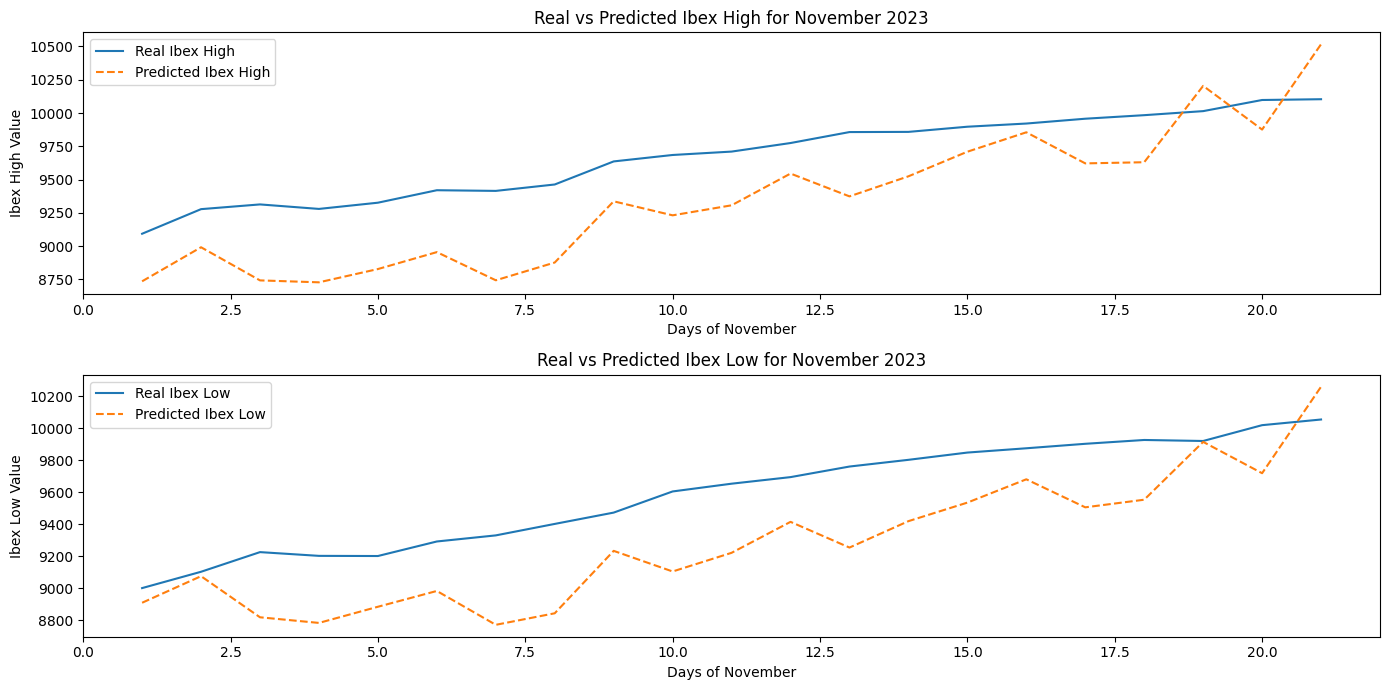

In [187]:
# Prediction Analysis
import matplotlib.pyplot as plt

# Convertir las predicciones y los valores reales a numpy arrays para facilitar el manejo
predicted_high = np.squeeze(predicted_high)
predicted_low = np.squeeze(predicted_low)
test_labels_high = test_labels_high.values
test_labels_low = test_labels_low.values

# Crear un rango de índices para los días de noviembre
days_november = np.arange(1, len(test_labels_high) + 1)

# Crear gráficos para Ibex High
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(days_november, test_labels_high, label='Real Ibex High')
plt.plot(days_november, predicted_high, label='Predicted Ibex High', linestyle='--')
plt.xlabel('Days of November')
plt.ylabel('Ibex High Value')
plt.title('Real vs Predicted Ibex High for November 2023')
plt.legend()

# Crear gráficos para Ibex Low
plt.subplot(2, 1, 2)
plt.plot(days_november, test_labels_low, label='Real Ibex Low')
plt.plot(days_november, predicted_low, label='Predicted Ibex Low', linestyle='--')
plt.xlabel('Days of November')
plt.ylabel('Ibex Low Value')
plt.title('Real vs Predicted Ibex Low for November 2023')
plt.legend()

plt.tight_layout()
plt.show()


In [188]:
# Accuracy Model Prediction
from sklearn.metrics import mean_absolute_error

# Calcular el MAE (Mean Absolute Error) para Ibex High y Low
mae_high = mean_absolute_error(test_labels_high, predicted_high)
mae_low = mean_absolute_error(test_labels_low, predicted_low)

# Calcular el porcentaje de acierto
# La fórmula es: 100 - (MAE / Promedio de los valores reales) * 100
accuracy_high = 100 - (mae_high / np.mean(test_labels_high)) * 100
accuracy_low = 100 - (mae_low / np.mean(test_labels_low)) * 100

print(f"Porcentaje de acierto del modelo para Ibex High: {accuracy_high:.2f}%")
print(f"Porcentaje de acierto del modelo para Ibex Low: {accuracy_low:.2f}%")


Porcentaje de acierto del modelo para Ibex High: 96.08%
Porcentaje de acierto del modelo para Ibex Low: 96.61%
